In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

from numpy import set_printoptions
set_printoptions(precision=3)

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/s-totally/Kaggle-Titanic/master/titanictrain.csv')

In [6]:
df_test = pd.read_csv('https://raw.githubusercontent.com/s-totally/Kaggle-Titanic/master/titanictest.csv')

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Data exploration

In [10]:
# How many missing values? 

df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

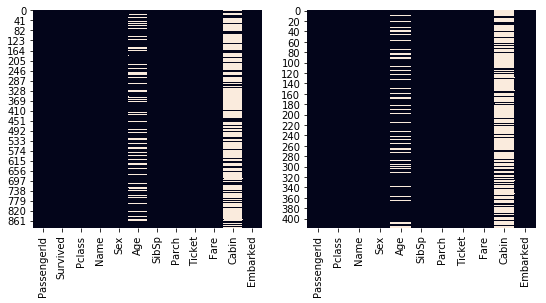

In [18]:
fig, ax = plt.subplots(1,2, figsize = (2*4.5, 1*4)) # ax variable is a 2x2 numpy array. Call each one by one 
sns.heatmap(df_train.isnull(), ax=ax[0], cbar=False)
sns.heatmap(df_test.isnull(), ax=ax[1], cbar=False)
plt.show()

# Visualizing categorical columns

In [29]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

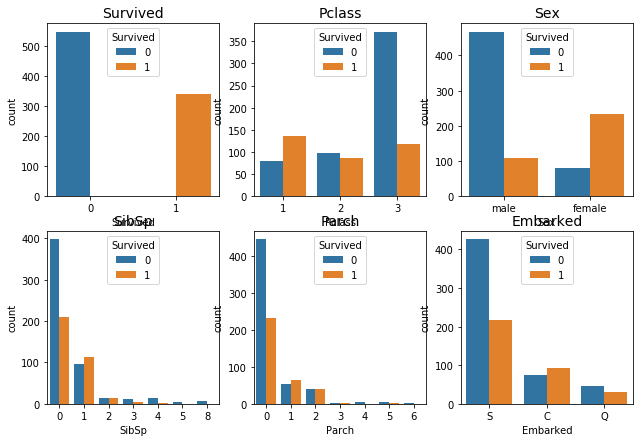

In [31]:
n_rows, n_cols = 2, 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
b
# For each of the 2 rows, 3 cols (i.e. 6 plots)
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c 
        ax = axs[r][c]
        sns.countplot(df_train[cat_cols[i]], hue=df_train['Survived'], ax=ax)
        ax.set_title(cat_cols[i], fontsize=14)
        ax.legend(title='Survived', loc='upper center')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


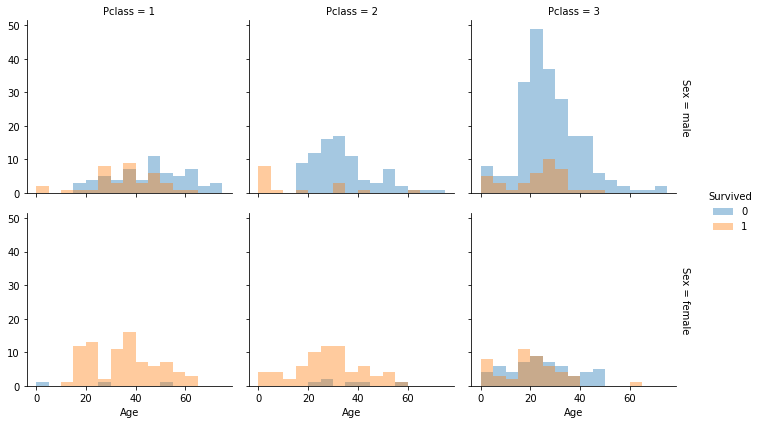

In [40]:
# Refer: https://seaborn.pydata.org/tutorial/axis_grids.html
bins = np.arange(0, 80, 5)

g = sns.FacetGrid(data=df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', bins=bins, kde=False)
g.add_legend()
plt.show()

Best chances to survive for male passengers was in Pclass 1 or being below 5 years old.
Lowest survival rate for female passengers was in Pclass 3 and being older than 40.
Most passengers were male, in Pclass 3 and between 15-35 years old.

In [ ]:
df_train.columns

In [ ]:
# Fill missing age values with the mean age of the passenger class to which it belongs 
df_train.loc[df_train['Age'].isna(), 'Age'] = df_train['Age'].mean()

In [ ]:
df_train.isna().sum()

In [ ]:
# Remove the columns Name, Ticket and Cabin
df_train = df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Column types and their respective counts 
df_train.info()

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [ ]:
df_train.Embarked.value_counts()

In [ ]:
# Replace missing values in 'Embarked' column with mode of that column, i.e. S (Southampton) 
from scipy.stats import mode
print(mode(df_train['Embarked'].dropna())[0][0])
mode_embarked = mode(df_train['Embarked'].dropna())[0][0]
df_train['Embarked'] = df_train['Embarked'].fillna(mode_embarked)

In [ ]:
df_train.isna().sum()

In [ ]:
# Have to convert columns 'Sex' and 'Embarked' to numerical
df_train['Sex'].value_counts()

In [ ]:
df_train['Male'] = df_train['Sex'].map({'male':1, 'female':0}).astype(int)

In [ ]:
df_train.info()

In [ ]:
df_train['Embarked'].unique()

In [ ]:
# Create dummy variables for the Embarked column 
pd.get_dummies(df_train['Embarked'], prefix="Embarked").head(10)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'], prefix='Embarked')],axis=1)

In [ ]:
df_train.head()

In [ ]:
df_train = df_train.drop(['Sex', 'Embarked'], axis=1)

In [ ]:
# Reorder columns so that Survived is the first column 
cols = df_train.columns.tolist()
print(cols)

In [ ]:
cols = [cols[1]] + cols[0:1] + cols[2:] # Because cols[1] returns a string 'Survived'. We make this a list and then combine with
# other lists 
df_train = df_train[cols]
df_train.info()

In [ ]:
# Convert training data from pandas dataframe to numpy array
df_train = df_train.values

### Training the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [ ]:
param_grid = {
    'max_features':[0.5, 1],
    'max_depth':[5., None]#Max number of branches, either 5 levels or no limitations
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid, cv=5, verbose=3)

In [ ]:
grid_search.fit(X=train_df[0:, 2:], y=train_df[0:, 0])

In [ ]:
grid_search.grid_scores_

In [ ]:
# Lets sort the results and determine the best-performing tuning parameters 
sorted(grid_search.grid_scores_, key=lambda x: x.mean_validation_score)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
# Lets set these tuning parameters to our model 
model = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=0.5)

In [ ]:
model = model.fit(X=train_df[0:, 2:], y=train_df[0:,0])

In [ ]:
model

In [ ]:
df_test.head(10)

In [ ]:
# Process test data similar to training data 
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test['Age'] = df_test['Age'].fillna(age_mean)

In [ ]:
# For the column Fare, however, it makes sense to fill in the NaN values with the mean by the column Pclass, or Passenger class.
fare_means = df.pivot_table('Fare', index='Pclass', aggfunc='mean')
fare_means

In [ ]:
df_test['Pclass'].unique()

In [ ]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [ ]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['Sex'], prefix='Sex')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'], prefix='Embarked')], axis=1)
df_test.head(10)

In [ ]:
df_test = df_test.drop(['Sex', 'Embarked'], axis=1)
df_test.head(10)

In [ ]:
df_test_values = df_test.values

In [ ]:
output = model.predict(df_test_values[:,1:])

In [ ]:
# Create pandas dataframe by combining index from test data with output of predictions 
result = np.c_[df_test[:,0].astype(int), output.astype(int)]
df_result = pd.DataFrame(result[:,0:2], columns = ['PassengerId', 'Survived'])
df_result.head()

In [ ]:
df_result.shape